In [380]:
import pandas as pd
import matplotlib.pyplot as plt

In [381]:
df = pd.read_csv("internet_service_churn.csv")

In [382]:
df.shape

(72274, 11)

In [383]:
df.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [384]:
df.describe()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,7.227400e+04,72274.000000,72274.000000,72274.000000,72274.000000,50702.000000,72274.000000,71893.000000,71893.000000,72274.000000,72274.000000
mean,8.463182e+05,0.815259,0.334629,2.450051,18.942483,0.716039,0.274234,43.689911,4.192076,0.207613,0.554141
std,4.891022e+05,0.388090,0.471864,2.034990,13.215386,0.697102,0.816621,63.405963,9.818896,0.997123,0.497064
min,1.500000e+01,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.222165e+05,1.000000,0.000000,0.930000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000,0.000000
50%,8.477840e+05,1.000000,0.000000,1.980000,19.000000,0.570000,0.000000,27.800000,2.100000,0.000000,1.000000
75%,1.269562e+06,1.000000,1.000000,3.300000,22.000000,1.310000,0.000000,60.500000,4.800000,0.000000,1.000000
max,1.689744e+06,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000


### Checking any null values

In [385]:
df.isna().any()

id                             False
is_tv_subscriber               False
is_movie_package_subscriber    False
subscription_age               False
bill_avg                       False
reamining_contract              True
service_failure_count          False
download_avg                    True
upload_avg                      True
download_over_limit            False
churn                          False
dtype: bool

In [386]:
df.isna().sum()

id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


## Data Cleaning

### Let's rename column
`reamining_contract` to `remaining_contract`

In [388]:
df.rename(columns={"reamining_contract": "remaining_contract"}, inplace=True)

### Delete row(s) with negative value in column `subscription_age`
Because the subscription_age value cannot be negative.

In [389]:
(df['subscription_age'] < 0).sum()

np.int64(1)

In [390]:
# Drop rows where subscription_age < 0
df = df.drop(df[df['subscription_age'] < 0].index)

<Axes: xlabel='is_tv_subscriber'>

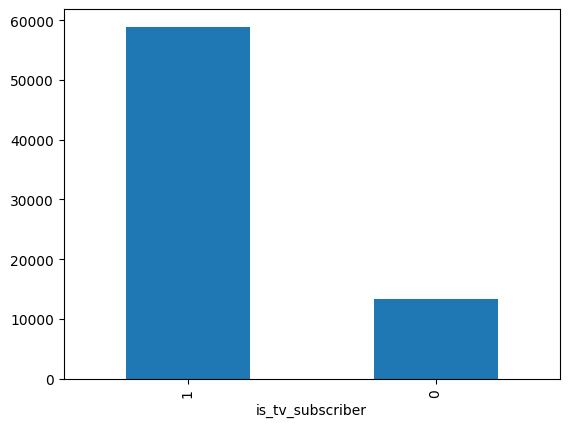

In [391]:
df['is_tv_subscriber'].value_counts().plot(kind='bar')

<Axes: xlabel='is_movie_package_subscriber'>

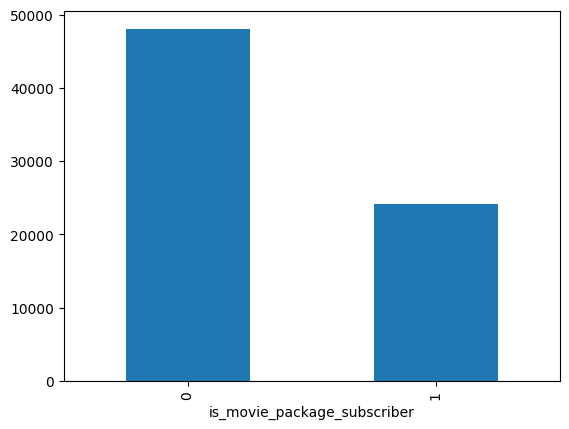

In [392]:
df['is_movie_package_subscriber'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

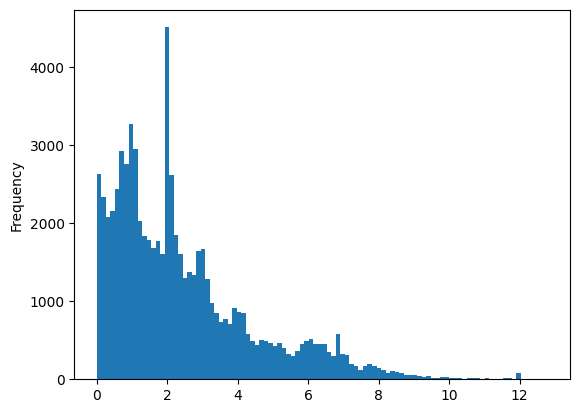

In [393]:
df['subscription_age'].plot(kind='hist', bins=100)

<Axes: >

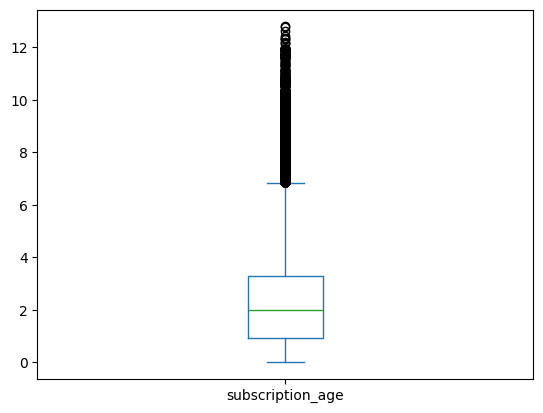

In [394]:
df['subscription_age'].plot(kind='box')

In [395]:
(df['subscription_age'] == 0).sum()

np.int64(278)

In [396]:
df['service_failure_count'].value_counts()

service_failure_count
0     60406
1      7665
2      2453
3       901
4       395
5       201
6        97
7        58
8        37
9        17
10       15
11        6
12        6
13        5
14        4
16        3
15        2
18        1
19        1
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

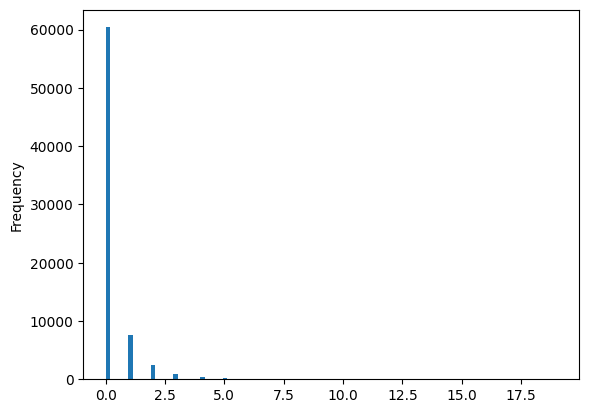

In [397]:
df['service_failure_count'].plot(kind='hist', bins=100)

<Axes: >

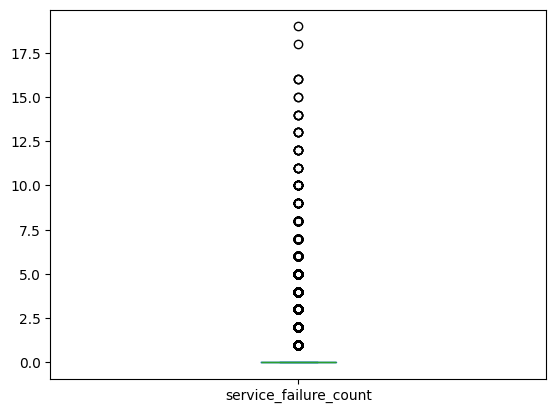

In [398]:
df['service_failure_count'].plot(kind='box')

## Dealing with outliers
In column `service_failure_count` let's delete rows above the upper bound value of
`Q3 + IQR`

In [399]:
# # Calculate Q1, Q3, and IQR
# Q1 = df['service_failure_count'].quantile(0.25)  # 25th percentile
# Q3 = df['service_failure_count'].quantile(0.75)  # 75th percentile
# IQR = Q3 - Q1  # Interquartile Range

# # Define the upper threshold
# upper_threshold = Q3 + 1.5 * IQR

# # Filter out rows where 'service_failure_count' exceeds the upper threshold
# df = df[df['service_failure_count'] <= upper_threshold]


In [400]:
df['download_over_limit'].value_counts()

download_over_limit
0    68372
1      766
6      688
2      560
7      504
3      498
4      456
5      429
Name: count, dtype: int64

## Dealing with missing values
Since `remaining_contract` contains huge number of missing rows, but this column seems important for the predicting the churn. So, we try to impute the missing value.

We think imputing the missing rows with 0 value of remaining_contract would be better.


In [401]:
df['remaining_contract'] = df['remaining_contract'].fillna(0)

## `download_avg` and `upload_avg` features seems important for churn prediction
If the user has large download and upload value, they are likely to stick with the service provider.

We are going to find the distrubution of present value in these columns, and then decide the appropriate imputation method.

<Axes: ylabel='Frequency'>

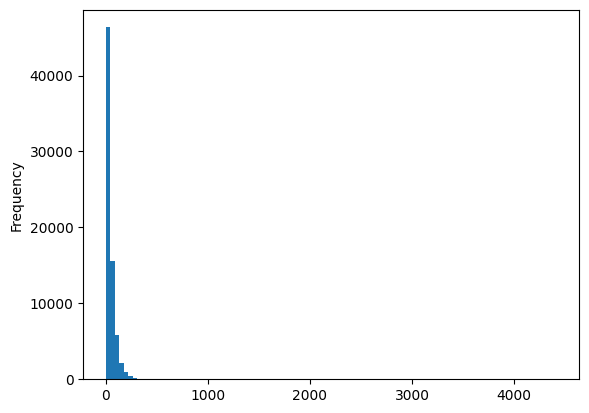

In [402]:
df['download_avg'].plot(kind='hist', bins=100)

In [403]:
(df['download_avg'] > 1000).sum()

np.int64(23)

In [404]:
(df['download_avg'] == 0).sum()

np.int64(10941)

<Axes: >

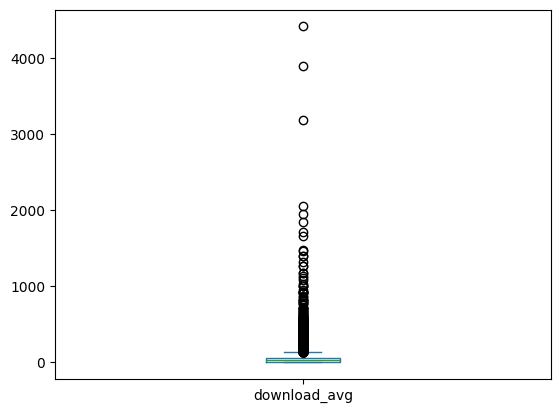

In [405]:
df['download_avg'].plot(kind='box')

### Let's delete the outlier from the column `download_avg` which are beyond `Q3 + IQR`

In [406]:
# Calculate Q1, Q3, and IQR
Q1 = df['download_avg'].quantile(0.25)  # 25th percentile
Q3 = df['download_avg'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range

# Define the upper threshold
upper_threshold = Q3 + 1.5 * IQR

# Filter out rows where 'service_failure_count' exceeds the upper threshold
df = df[df['download_avg'] <= upper_threshold]

<Axes: ylabel='Frequency'>

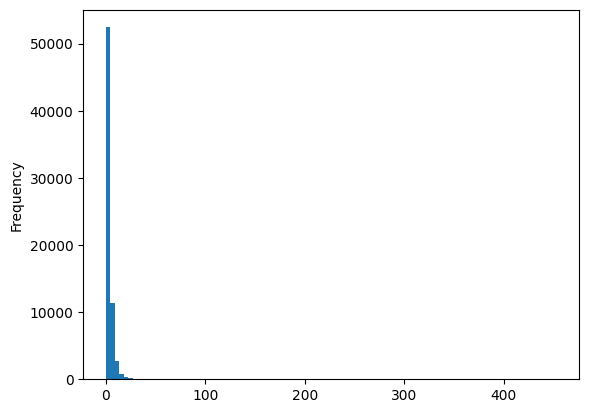

In [407]:
df['upload_avg'].plot(kind='hist', bins=100)

<Axes: >

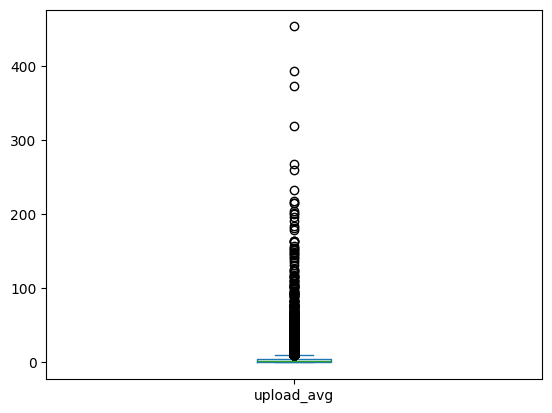

In [408]:
df['upload_avg'].plot(kind='box')

### Let's delete the outlier from the column `upload_avg` which are beyond `Q3 + IQR`

In [409]:
# Calculate Q1, Q3, and IQR
Q1 = df['upload_avg'].quantile(0.25)  # 25th percentile
Q3 = df['upload_avg'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range

# Define the upper threshold
upper_threshold = Q3 + 1.5 * IQR

# Filter out rows where 'service_failure_count' exceeds the upper threshold
df = df[df['upload_avg'] <= upper_threshold]

In [410]:
df.isna().sum()

id                             0
is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
remaining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64

Since, after removing outliers in the column `upload_avg` and `download_avg`, luckly, the missing rows are also wiped out.

<Axes: >

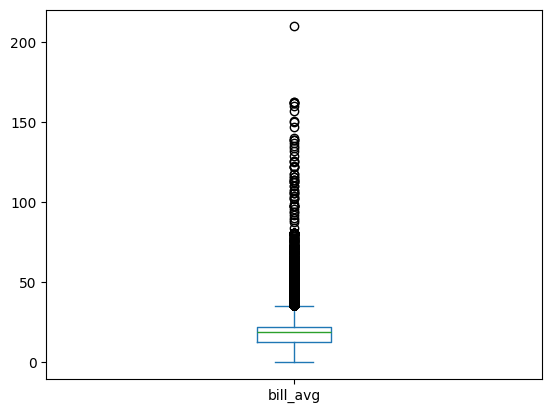

In [411]:
df['bill_avg'].plot(kind='box')

<Axes: ylabel='Frequency'>

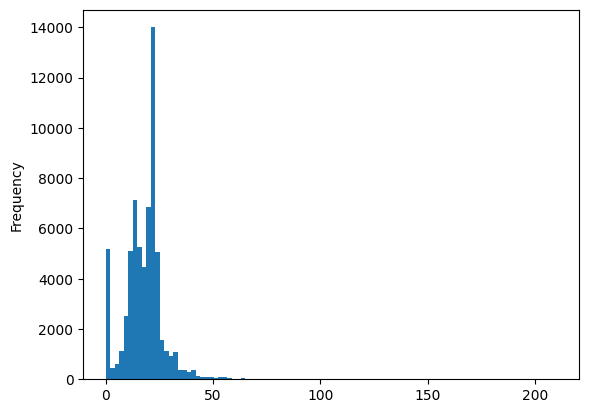

In [412]:
df['bill_avg'].plot(kind='hist', bins=100)

### There are outliers in the column `bill_avg` as well
Let's delete the rows containint the outliers

In [413]:
# Calculate Q1, Q3, and IQR
Q1 = df['bill_avg'].quantile(0.25)  # 25th percentile
Q3 = df['bill_avg'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range

# Define the upper threshold
upper_threshold = Q3 + 1.5 * IQR

# Filter out rows where 'service_failure_count' exceeds the upper threshold
df = df[df['bill_avg'] <= upper_threshold]

In [414]:
df.shape

(62791, 11)

<Axes: xlabel='download_over_limit'>

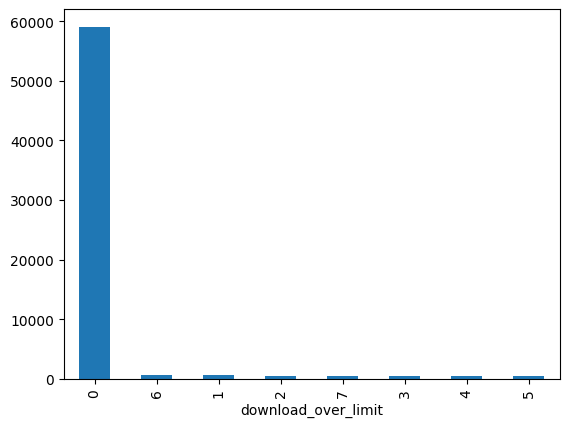

In [415]:
df['download_over_limit'].value_counts().plot(kind='bar')

In [416]:
df['download_over_limit'].value_counts()

download_over_limit
0    59061
6      686
1      681
2      521
7      502
3      472
4      444
5      424
Name: count, dtype: int64

<Axes: >

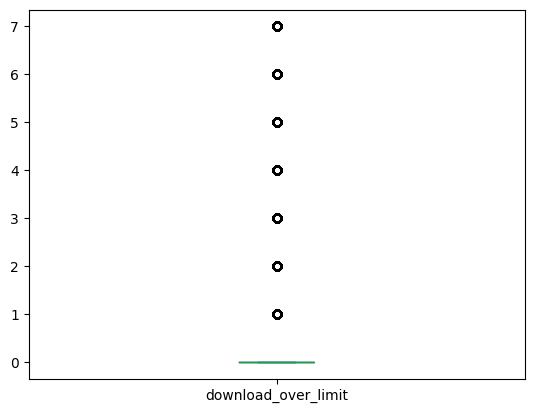

In [417]:
df['download_over_limit'].plot(kind='box')

In [418]:
df['churn'].value_counts()

churn
1    36332
0    26459
Name: count, dtype: int64

<Axes: xlabel='churn'>

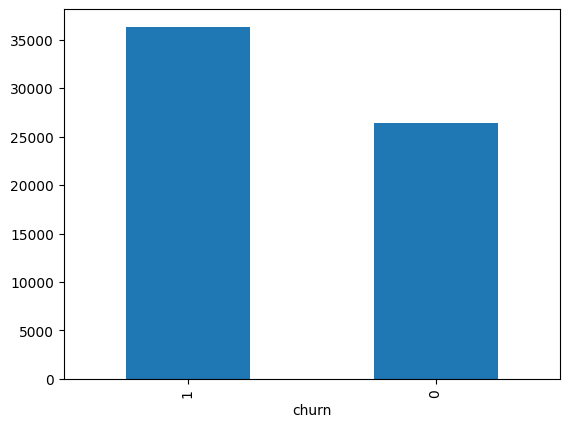

In [419]:
df['churn'].value_counts().plot(kind='bar')

Since the class seems not so imbalanced, we stick with this imbalanced classs, and design ML model perform some evaluation metrics. If evaluation metrics are not okay, we can rollback here to perform class balancing.

In [420]:
df.head(10)

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,0.00,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,0.00,1,0.0,0.0,0,1
4,34,0,0,6.39,0,0.00,0,0.0,0.0,0,1
5,56,1,1,11.94,32,1.38,0,69.4,4.0,0,0
6,71,0,0,8.96,18,0.00,0,21.3,2.0,0,1
7,84,0,0,5.48,14,0.00,1,0.0,0.0,0,1
8,94,0,0,8.54,0,0.00,0,0.0,0.0,0,1
9,112,0,0,8.33,0,0.00,0,0.0,0.0,0,1


In [421]:
df.describe()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,6.279100e+04,62791.000000,62791.000000,62791.000000,62791.000000,62791.000000,62791.000000,62791.000000,62791.000000,62791.000000,62791.000000
mean,8.255999e+05,0.813206,0.318708,2.435822,16.982211,0.482639,0.251007,31.508664,2.401975,0.233553,0.578618
std,4.905625e+05,0.389749,0.465979,2.015332,7.548568,0.662231,0.759658,31.400210,2.396261,1.060264,0.493784
min,1.500000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.979900e+05,1.000000,0.000000,0.930000,13.000000,0.000000,0.000000,4.800000,0.400000,0.000000,0.000000
50%,8.148620e+05,1.000000,0.000000,1.980000,18.000000,0.000000,0.000000,22.800000,1.700000,0.000000,1.000000
75%,1.250868e+06,1.000000,1.000000,3.270000,22.000000,1.010000,0.000000,48.900000,3.800000,0.000000,1.000000
max,1.689744e+06,1.000000,1.000000,12.800000,35.000000,2.870000,16.000000,141.200000,10.000000,7.000000,1.000000


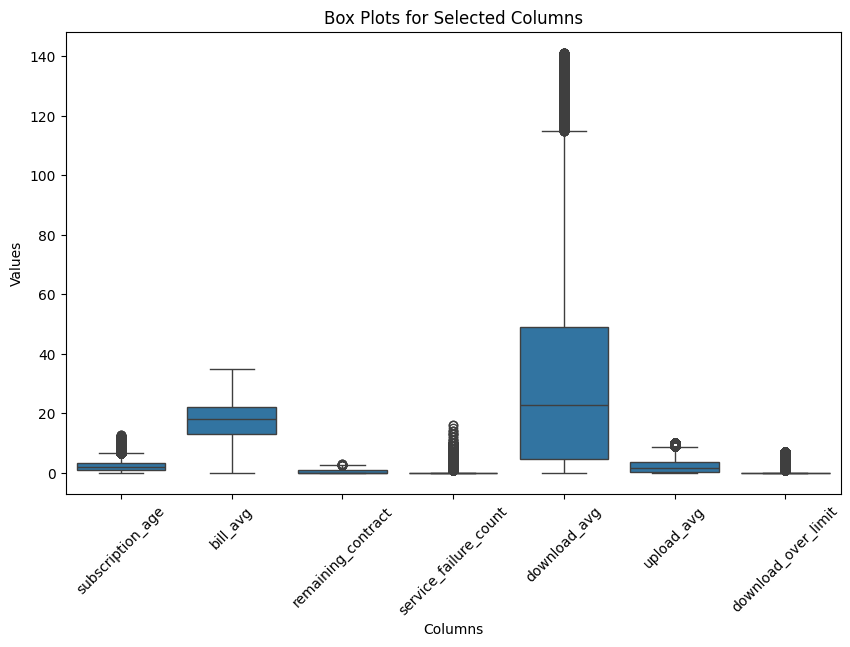

In [422]:
import seaborn as sns

# Select only the required columns
selected_columns = ['subscription_age', 'bill_avg', 'remaining_contract', 'service_failure_count', 'download_avg', 'upload_avg', 'download_over_limit']
df_selected = df[selected_columns]

# Melt the DataFrame to long format for Seaborn
df_melted = df_selected.melt(var_name='Columns', value_name='Values')

# Create a box plot for the selected columns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Columns', y='Values', data=df_melted)
plt.title('Box Plots for Selected Columns')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [423]:
# Using matplotlib

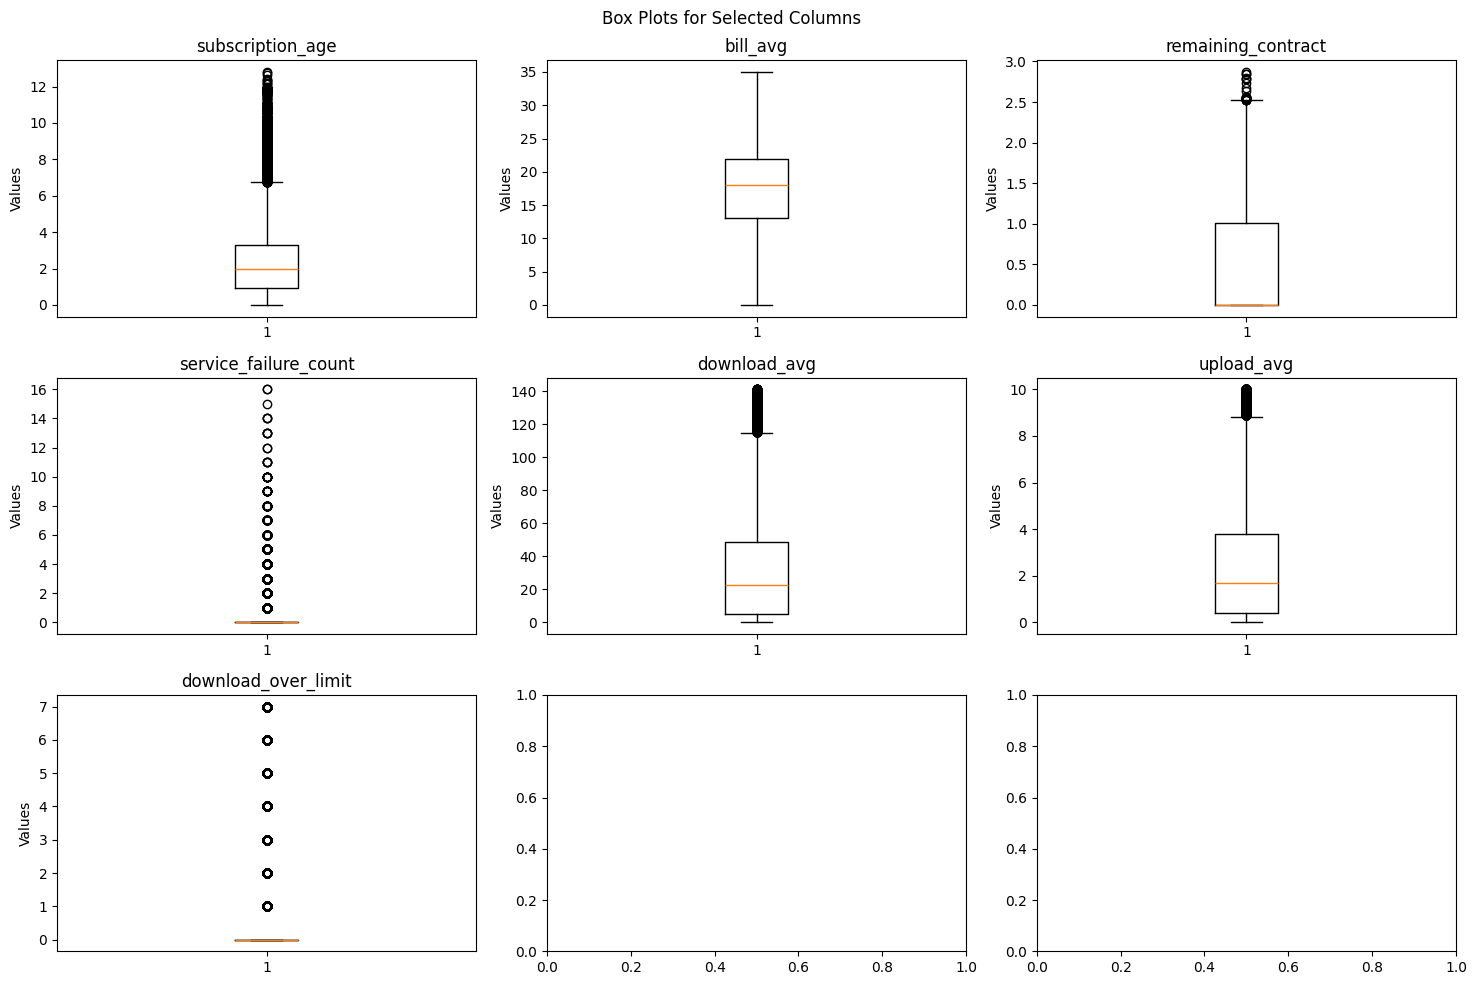

In [424]:
# Select only the required columns
selected_columns = ['subscription_age', 'bill_avg', 'remaining_contract', 'service_failure_count', 'download_avg', 'upload_avg', 'download_over_limit']
df_selected = df[selected_columns]

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 10))  # 2 rows, 3 columns
fig.suptitle('Box Plots for Selected Columns')

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot box plots for each selected column
for i, column in enumerate(df_selected.columns):
    axes[i].boxplot(df_selected[column])
    axes[i].set_title(column)
    axes[i].set_ylabel('Values')

# Adjust layout
plt.tight_layout()
plt.show()

Since, all the values seems within the `Q3+IQR`, we are ready to go to develop ML models.

In [425]:
df.shape

(62791, 11)

## ML model design

### Logistic Regression
We first start with the simplest model `Logistic Regression` to perform internet churn prediction.

In [426]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [427]:
df.columns

Index(['id', 'is_tv_subscriber', 'is_movie_package_subscriber',
       'subscription_age', 'bill_avg', 'remaining_contract',
       'service_failure_count', 'download_avg', 'upload_avg',
       'download_over_limit', 'churn'],
      dtype='object')

In [428]:
feature_columns = ['is_tv_subscriber', 'is_movie_package_subscriber',
                   'subscription_age', 'bill_avg', 'remaining_contract',
                   'service_failure_count', 'download_avg', 'upload_avg',
                   'download_over_limit']

column_2_normalize = ['subscription_age', 'bill_avg', 'remaining_contract', 'service_failure_count', 'download_avg', 'upload_avg', 'download_over_limit']
target = ['churn']

In [429]:
standard_scaler = StandardScaler()

X = df[feature_columns]
y = df[target].values.ravel()

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), column_2_normalize),
        ('passthrough', 'passthrough', [col for col in feature_columns if col not in column_2_normalize])
    ]
)

# Fit and transform the data
X_scaled = preprocessor.fit_transform(df)

In [430]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=True)

In [297]:
lr_model = LogisticRegression()

In [298]:
lr_model.fit(X_train, y_train)

LogisticRegression()

### Evaluation metrics

In [299]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [300]:
y_pred_lr = lr_model.predict(X_test)

In [302]:
print(f"Classification report:")
print(classification_report(y_test, y_pred_lr))
print(f"ROC-AUC Score: ")
print(roc_auc_score(y_test, y_pred_lr))
print(f"Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_lr))

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      5318
           1       0.88      0.92      0.90      7241

    accuracy                           0.88     12559
   macro avg       0.88      0.87      0.88     12559
weighted avg       0.88      0.88      0.88     12559

ROC-AUC Score: 
0.8731078883623036
Confusion Matrix: 
[[4387  931]
 [ 570 6671]]


### SVM

In [303]:
from sklearn.svm import SVC

In [309]:
svc_model = SVC(kernel='rbf', C=1.0)

In [310]:
svc_model.fit(X_train, y_train)

SVC()

In [311]:
y_pred_svc = svc_model.predict(X_test)

In [312]:
print(f"Classification report:")
print(classification_report(y_test, y_pred_svc))
print(f"ROC-AUC Score: ")
print(roc_auc_score(y_test, y_pred_svc))
print(f"Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_svc))

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      5318
           1       0.92      0.93      0.93      7241

    accuracy                           0.92     12559
   macro avg       0.91      0.91      0.91     12559
weighted avg       0.92      0.92      0.92     12559

ROC-AUC Score: 
0.9121106181584028
Confusion Matrix: 
[[4735  583]
 [ 479 6762]]


### DecisionTreeClassifier

In [321]:
from sklearn.tree import DecisionTreeClassifier

In [322]:
dtc_model = DecisionTreeClassifier()

dtc_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [324]:
y_pred_dtc = dtc_model.predict(X_test)

In [325]:
print(f"Classification report:")
print(classification_report(y_test, y_pred_dtc))
print(f"ROC-AUC Score: ")
print(roc_auc_score(y_test, y_pred_dtc))
print(f"Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_dtc))

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      5318
           1       0.92      0.93      0.92      7241

    accuracy                           0.91     12559
   macro avg       0.91      0.91      0.91     12559
weighted avg       0.91      0.91      0.91     12559

ROC-AUC Score: 
0.9103180517070406
Confusion Matrix: 
[[4760  558]
 [ 539 6702]]


### RandomForestClassifier

In [431]:
from sklearn.ensemble import RandomForestClassifier

In [432]:
rf_model = RandomForestClassifier(n_estimators=500)

In [433]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [434]:
y_pred_rf = rf_model.predict(X_test)

In [435]:
print(f"Classification report:")
print(classification_report(y_test, y_pred_rf))
print(f"ROC-AUC Score: ")
print(roc_auc_score(y_test, y_pred_rf))
print(f"Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_rf))

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      5235
           1       0.97      0.94      0.95      7324

    accuracy                           0.95     12559
   macro avg       0.94      0.95      0.95     12559
weighted avg       0.95      0.95      0.95     12559

ROC-AUC Score: 
0.9478452257809757
Confusion Matrix: 
[[4987  248]
 [ 417 6907]]


In [437]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Map feature importances to feature names
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort by importance (optional)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                       Feature  Importance
2             subscription_age    0.603465
4           remaining_contract    0.133084
5        service_failure_count    0.089975
0             is_tv_subscriber    0.064185
1  is_movie_package_subscriber    0.054127
7                   upload_avg    0.025690
8          download_over_limit    0.020449
3                     bill_avg    0.006134
6                 download_avg    0.002891


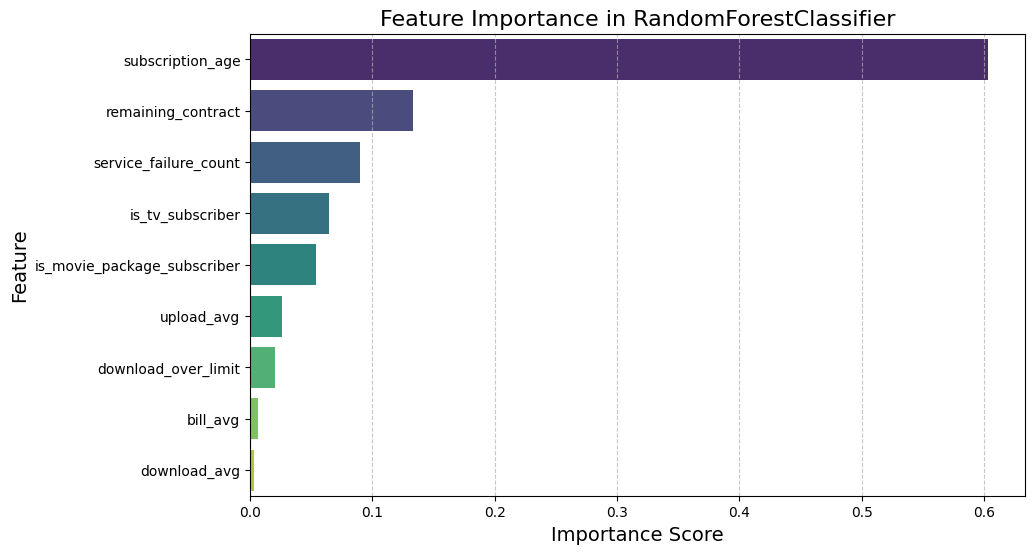

In [441]:
# Visualize the feature importance in horizontal bar graph.
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, hue='Feature', palette='viridis')

# Add labels and title
plt.title('Feature Importance in RandomForestClassifier', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Feature', fontsize=14)

# Add gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()